In [1]:
# Holy grail
import pandas as pd
import numpy as np

# Sklearn
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score # evaluation metric used for leaderboard scoring in this competition

# Statistics
import scipy.stats as stats

# Visualization
from matplotlib import pyplot as plt # pyplot is an easy to use scripting interface for plotting as oppose to more advanced artistic interface
import seaborn as sns # seaborn is even higher level graphing library built on top of matplotlib



In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
id_List = df_test['id']

In [3]:
df_train.shape, df_test.shape

((1235, 29), (824, 28))

In [4]:
df_train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [5]:
df_train.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [6]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [7]:
df_train.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [8]:
#drop id and hospital_number
df_train.drop(columns=['id', 'hospital_number'], inplace=True)

In [9]:
# Détection des valeurs manquantes
missing_values = df_train.isnull().sum()
missing_values

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [10]:
# Sélectionner les lignes ayant des valeurs manquantes dans les colonnes spécifiées
cols_with_missing_values = ['temp_of_extremities', 'peripheral_pulse', 'abdomen']
rows_with_missing = df_train[df_train[cols_with_missing_values].isnull().any(axis=1)]

# Afficher les premières lignes avec des valeurs manquantes pour observation
rows_with_missing.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
6,yes,adult,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,severe_pain,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
9,yes,adult,38.3,129.0,48.0,cool,reduced,pale_pink,less_3_sec,depressed,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died
14,yes,adult,38.0,124.0,88.0,cool,reduced,bright_red,less_3_sec,depressed,...,39.0,13.0,serosanguious,6.6,yes,2206,0,0,yes,lived
15,no,adult,38.3,44.0,24.0,warm,normal,pale_pink,less_3_sec,alert,...,33.0,6.5,cloudy,3.6,no,31110,0,0,yes,lived
16,yes,adult,37.8,60.0,16.0,cool,NaN,normal_pink,less_3_sec,depressed,...,37.0,75.0,NaN,1.0,yes,2208,0,0,no,euthanized


In [11]:
#afficher abdomen
rows_with_missing['abdomen']

6       NaN
9       NaN
14      NaN
15      NaN
16      NaN
       ... 
1213    NaN
1214    NaN
1216    NaN
1221    NaN
1223    NaN
Name: abdomen, Length: 274, dtype: object

In [12]:
#Imputation des valeurs manquantes pour temp_of_extremities, peripheral_pulse et mucous_membrane,capillary_refill_time, pain,peristalsis,abdominal_distention, nasogastric_tube, nasogastric_reflux, rectal_exam_feces, abdomen, abdomo_appearance
# df_train['temp_of_extremities'] = df_train['temp_of_extremities'].fillna(df_train['temp_of_extremities'].mode()[0])
# df_train['peripheral_pulse'] = df_train['peripheral_pulse'].fillna(df_train['peripheral_pulse'].mode()[0])
# df_train['abdomen'] = df_train['abdomen'].fillna(df_train['abdomen'].mode()[0])
# df_train['mucous_membrane'] = df_train['mucous_membrane'].fillna(df_train['mucous_membrane'].mode()[0])
# df_train['capillary_refill_time'] = df_train['capillary_refill_time'].fillna(df_train['capillary_refill_time'].mode()[0])
# df_train['pain'] = df_train['pain'].fillna(df_train['pain'].mode()[0])
# df_train['peristalsis'] = df_train['peristalsis'].fillna(df_train['peristalsis'].mode()[0])
# df_train['abdominal_distention'] = df_train['abdominal_distention'].fillna(df_train['abdominal_distention'].mode()[0])
# df_train['nasogastric_tube'] = df_train['nasogastric_tube'].fillna(df_train['nasogastric_tube'].mode()[0])
# df_train['nasogastric_reflux'] = df_train['nasogastric_reflux'].fillna(df_train['nasogastric_reflux'].mode()[0])
# df_train['rectal_exam_feces'] = df_train['rectal_exam_feces'].fillna(df_train['rectal_exam_feces'].mode()[0])
# df_train['abdomo_appearance'] = df_train['abdomo_appearance'].fillna(df_train['abdomo_appearance'].mode()[0])

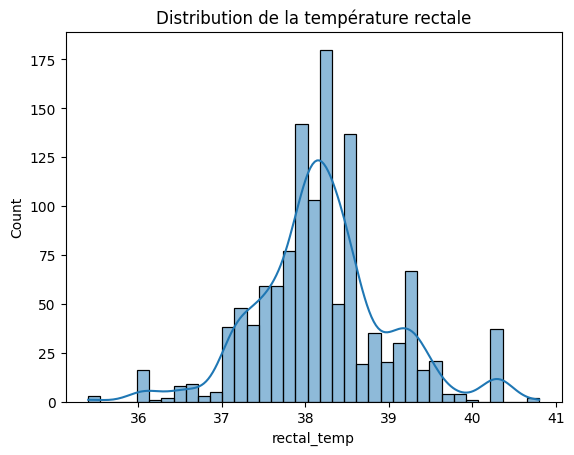

In [13]:
sns.histplot(df_train['rectal_temp'], kde=True)
plt.title('Distribution de la température rectale')
plt.show()

In [14]:
# # afficher les histogrammes de toutes les variables numériques
# df_train.hist(figsize=(20, 20))
# plt.show()

In [15]:
# # avec seaborn
# sns.pairplot(df_train, diag_kind='kde')
# plt.show()

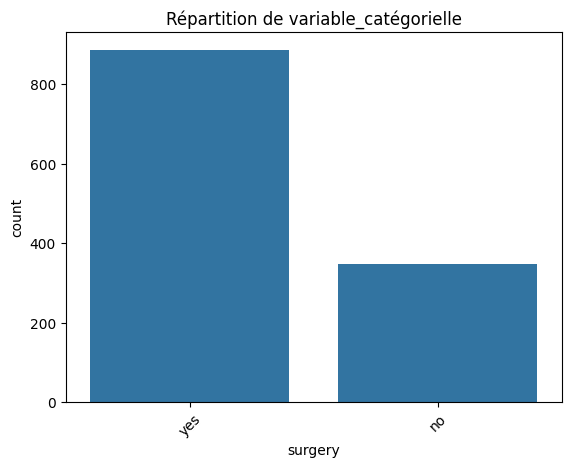

In [16]:
sns.countplot(x='surgery', data=df_train)
plt.title('Répartition de variable_catégorielle')
plt.xticks(rotation=45)  # Utile si les étiquettes sont longues
plt.show()

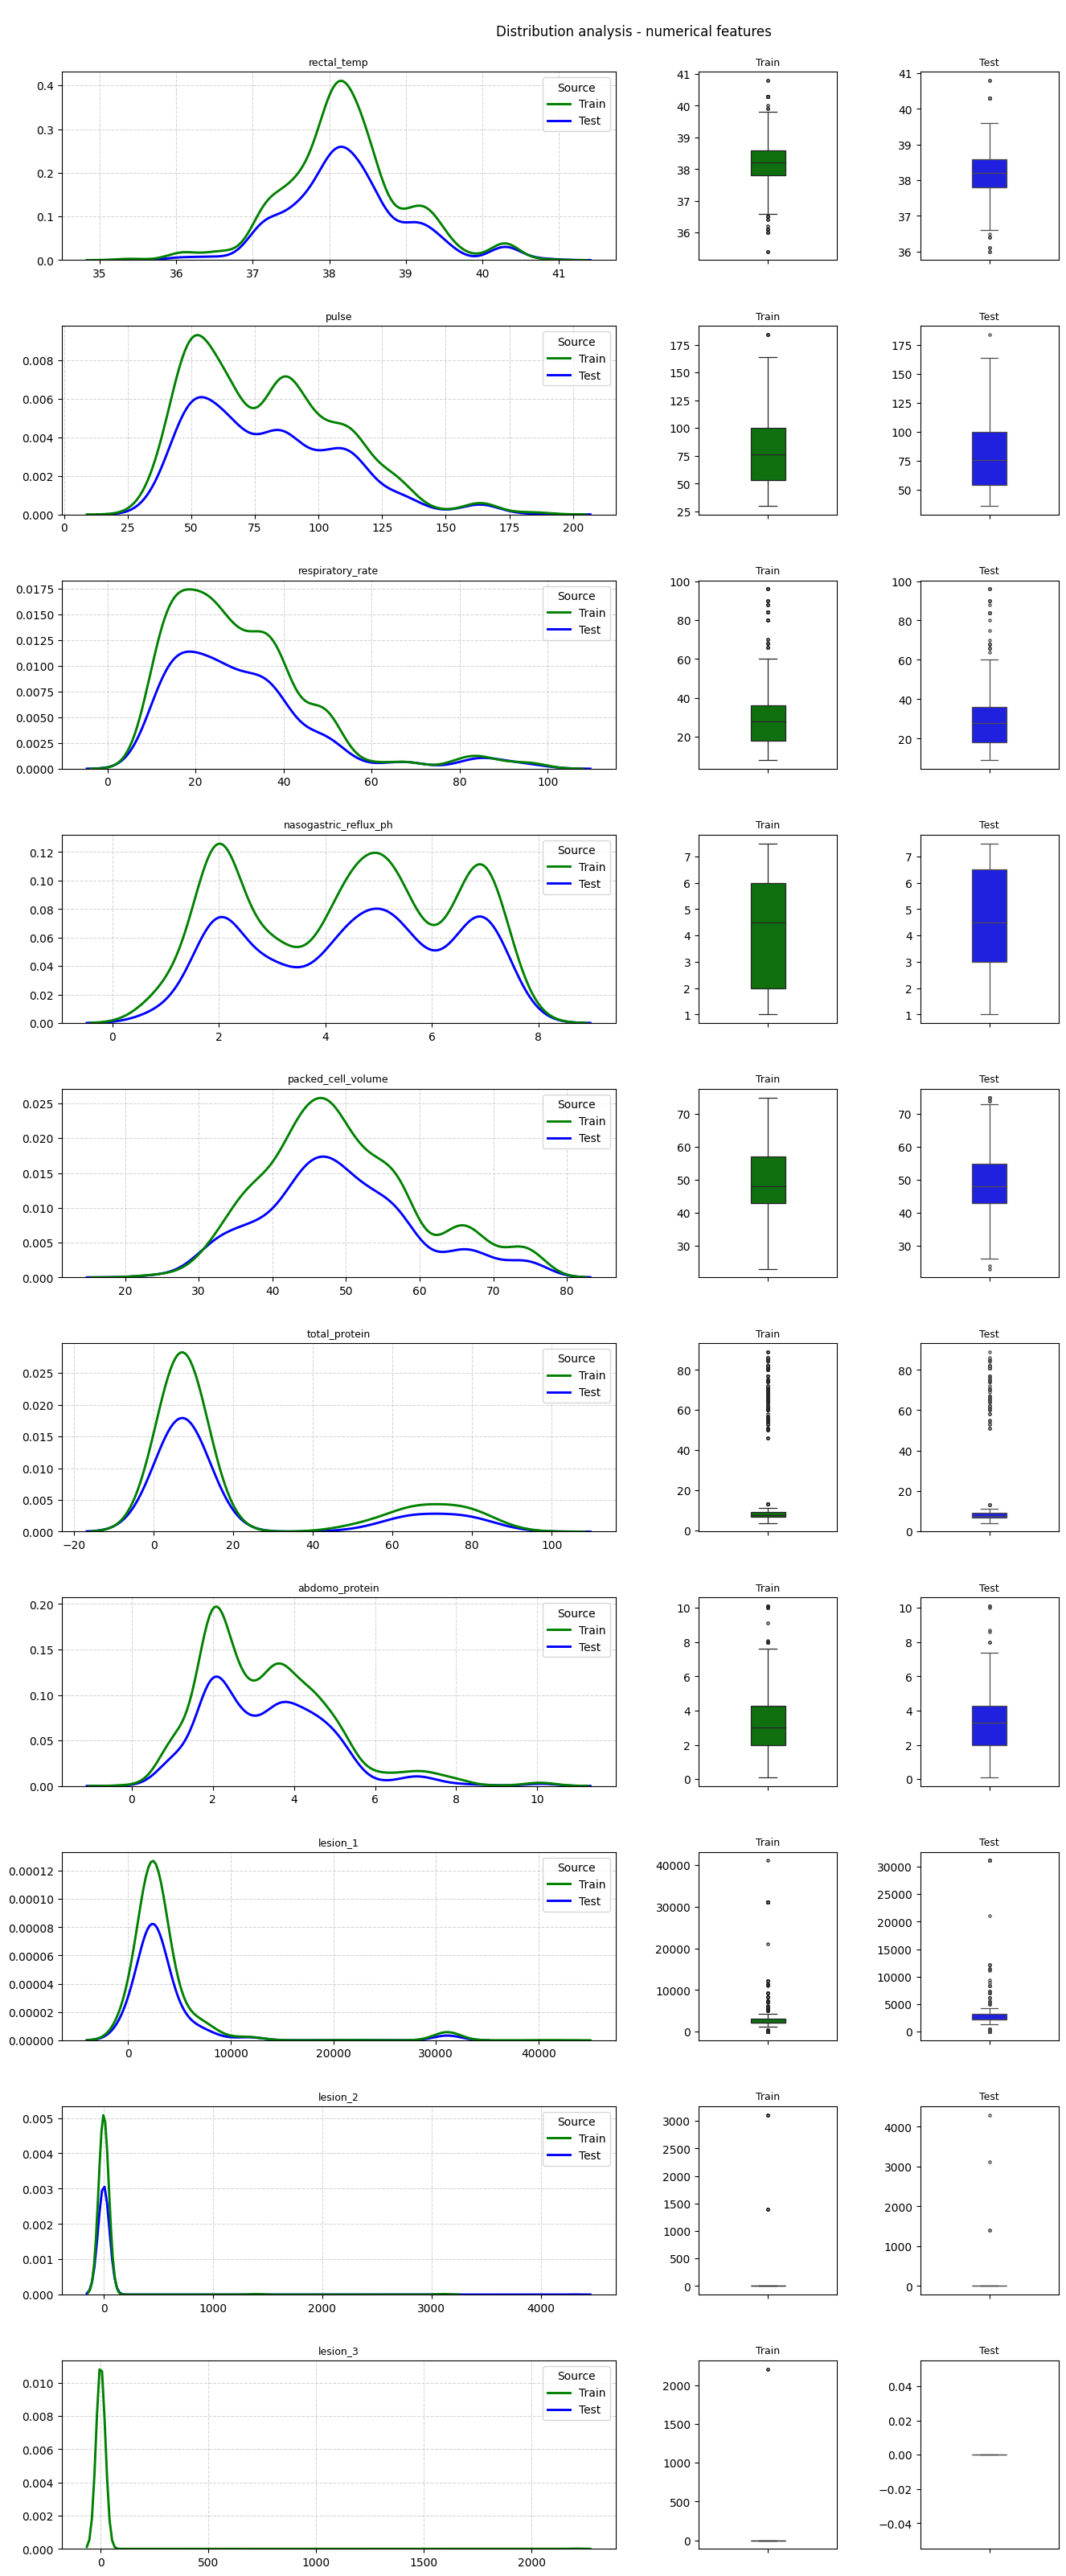

In [17]:
num_col = df_train.select_dtypes(include=['int64','float64']).columns

df = pd.concat([df_train[num_col].assign(Source = 'Train'), df_test[num_col].assign(Source = 'Test')], ignore_index = True)

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num_col), 3 ,figsize = (16, len(num_col) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})


for i,col in enumerate(num_col):
    ax = axes[i,0]
    sns.kdeplot(data = df[[col, 'Source']], x = col, hue = 'Source', palette=['green', 'blue'], linewidth = 2.1, warn_singular=False, ax = ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df.loc[df.Source == 'Train', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = 'green', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Train", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data = df.loc[df.Source == 'Test', [col]], y = col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = 'blue', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Test", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\n\n',fontsize = 12, y = 0.9, x = 0.57)



plt.show()


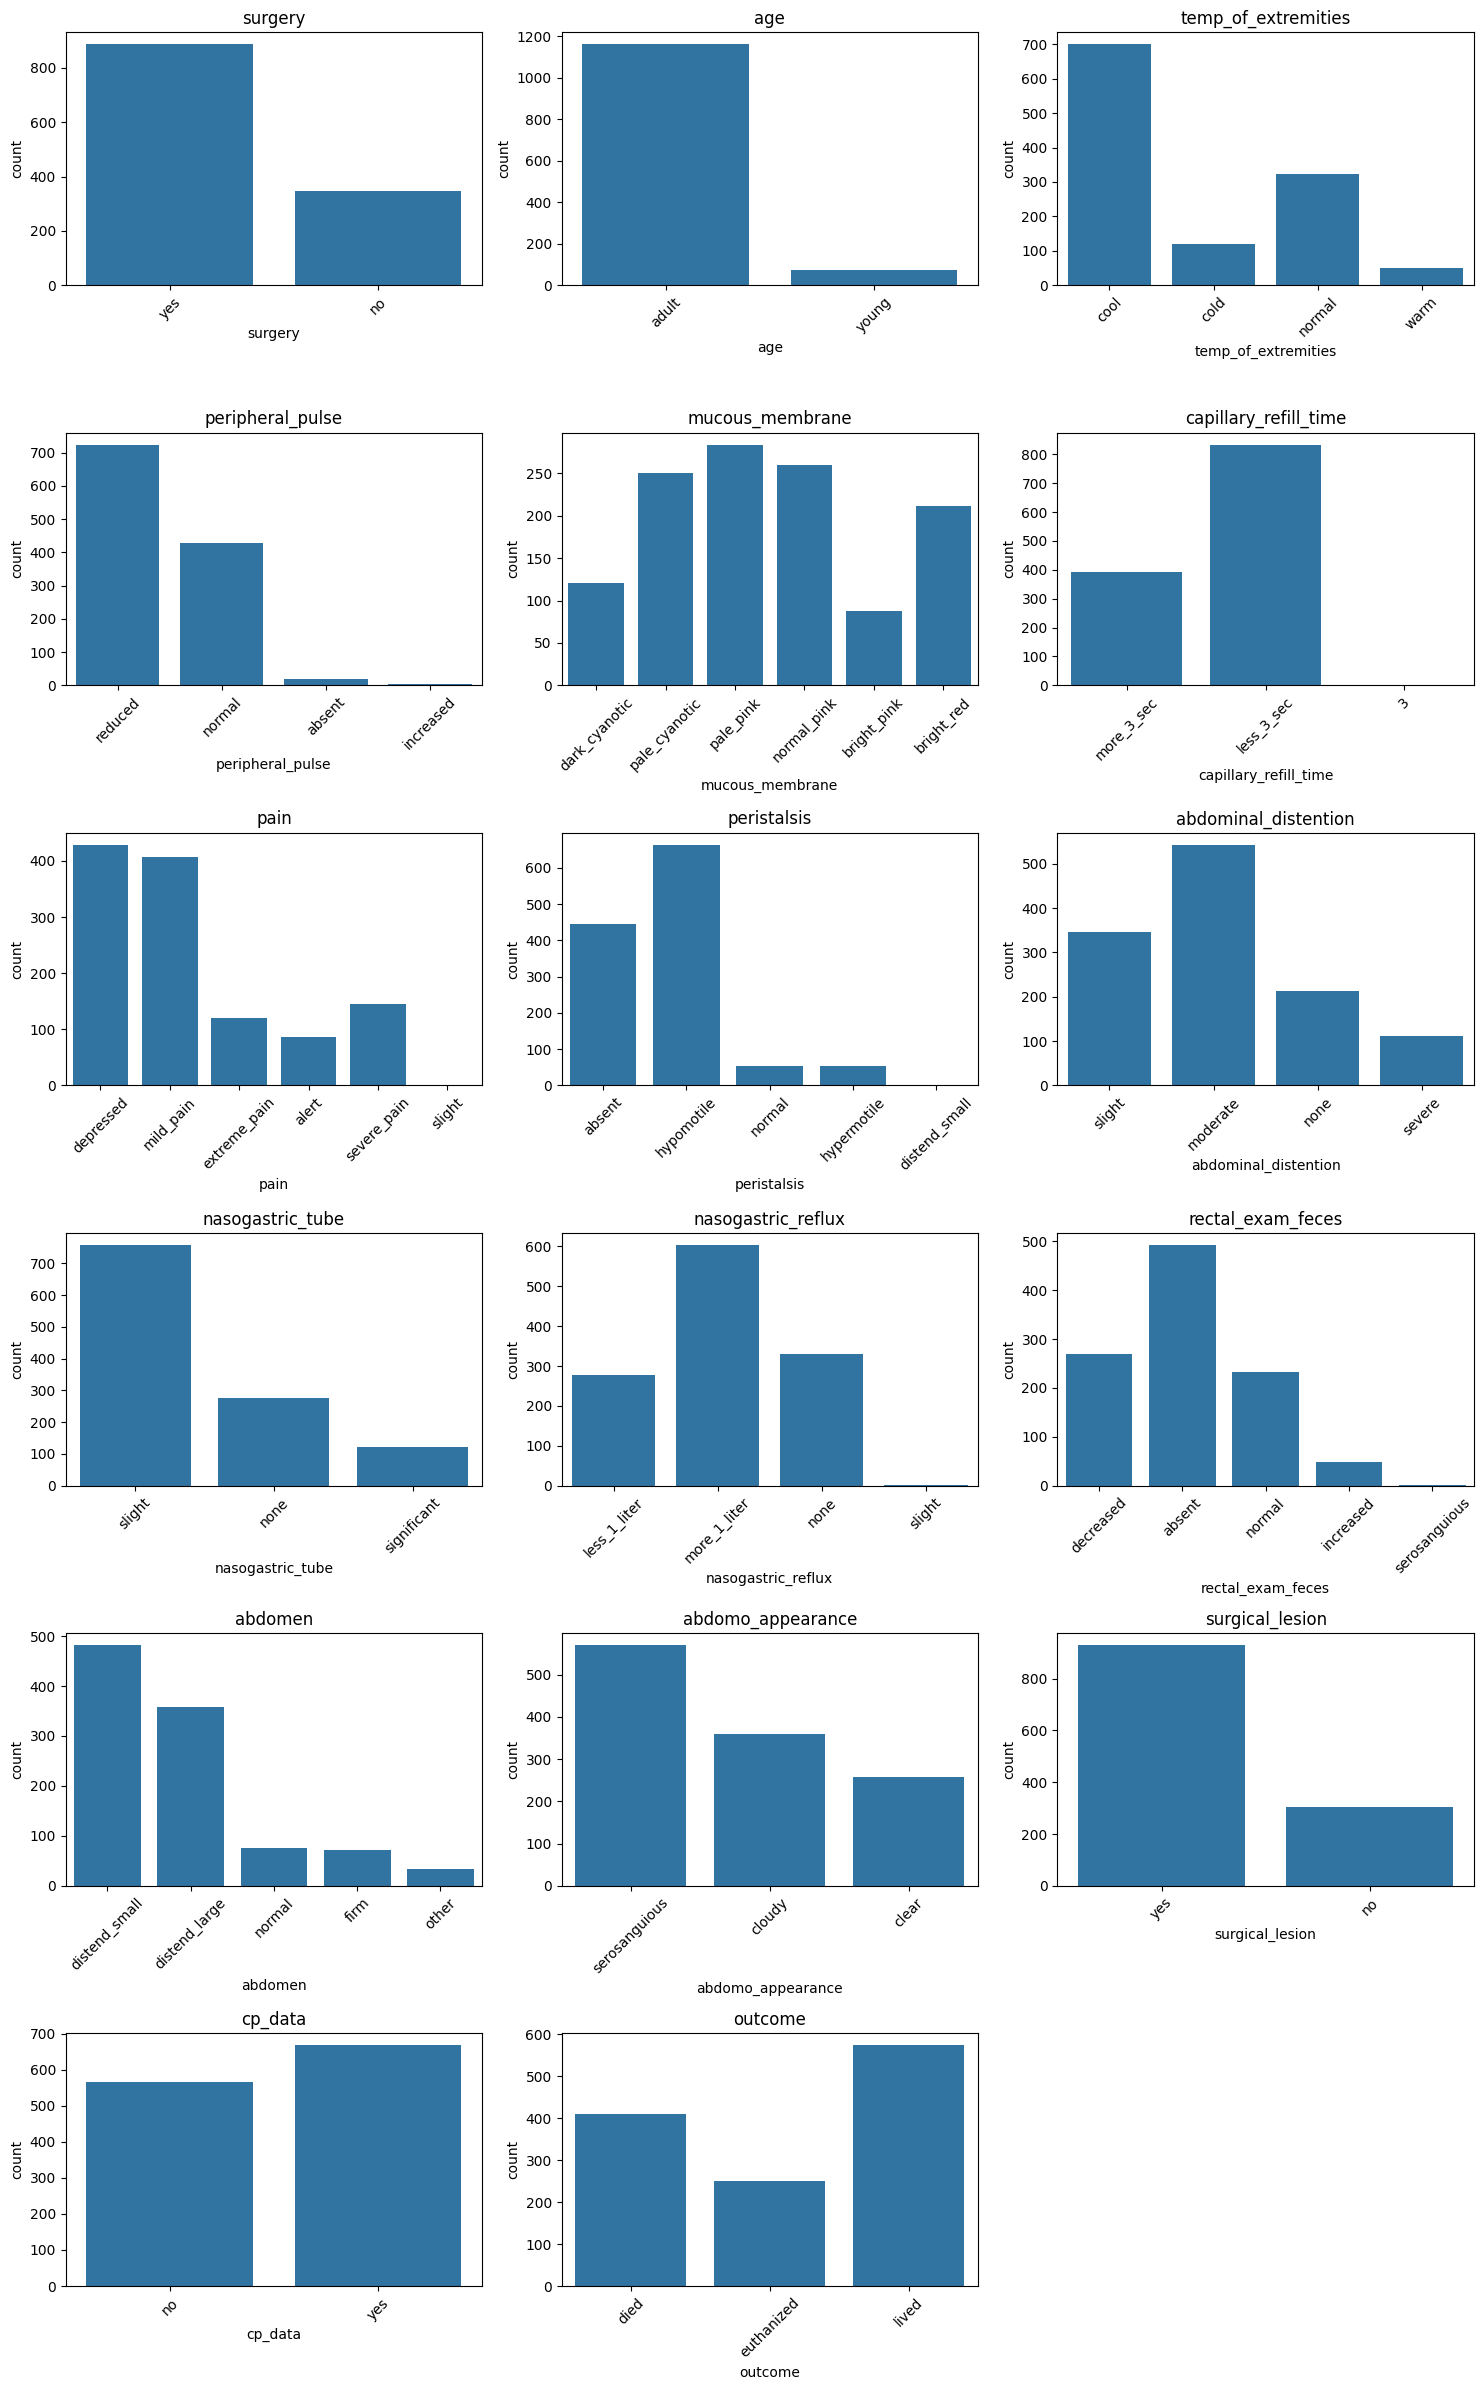

In [18]:
# Sélection des colonnes catégorielles
data_categorical = df_train.select_dtypes(include=['object'])

# Configuration de la figure pour afficher tous les diagrammes en barres
n_cols = 3
n_rows = (len(data_categorical.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for idx, column in enumerate(data_categorical.columns, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.countplot(x=column, data=data_categorical)
    plt.title(column)
    plt.xticks(rotation=45)  # Rotation des étiquettes si nécessaire

plt.tight_layout()
plt.show()


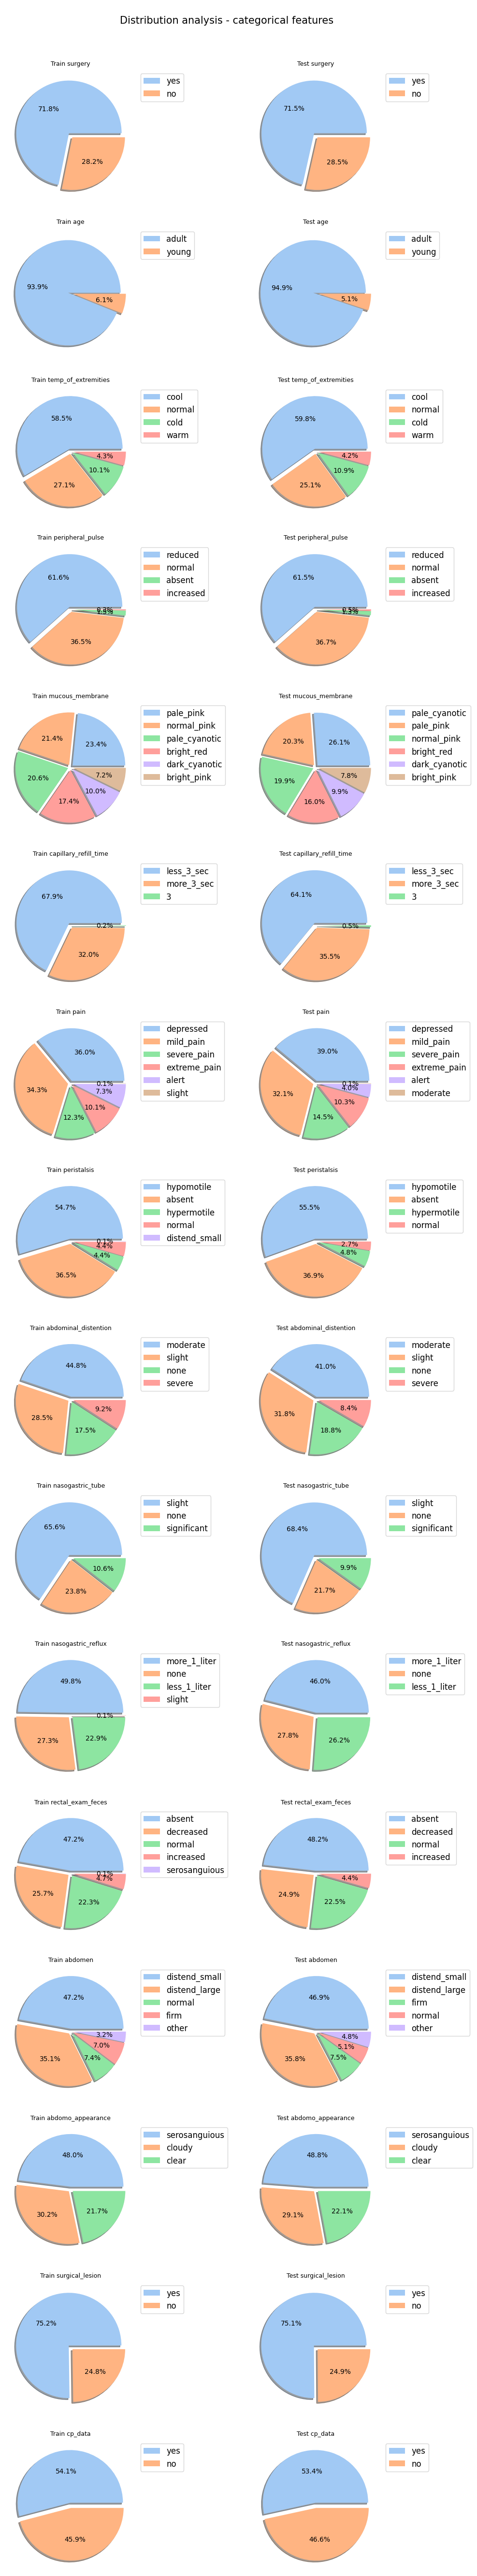

In [19]:
sns.set_palette('pastel')

num = df_train.drop(columns='outcome').select_dtypes(include=['object']).columns

df = pd.concat([df_train[num].assign(Source = 'train'), 
                df_test[num].assign(Source = 'test')], 
               axis=0, ignore_index = True)

fig, axes = plt.subplots(len(num), 2 ,figsize = (12, len(num) * 4.2))

for i,col in enumerate(num):
    train_dist = df.loc[df.Source == 'train', [col]].value_counts()
    test_dist = df.loc[df.Source == 'test', [col]].value_counts()
    
    ax = axes[i,0]
    ax.pie(train_dist, shadow=True, explode=[.05]*len(train_dist), autopct='%.1f%%')
    ax.legend([category[0] for category in train_dist.index], loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title(f'Train {col}',fontsize = 9)

    ax = axes[i,1]
    ax.pie(test_dist, shadow=True, explode=[.05]*len(test_dist), autopct='%.1f%%')
    ax.legend([category[0] for category in test_dist.index], loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title(f'Test {col}',fontsize = 9)


plt.suptitle(f"\nDistribution analysis - categorical features\n",fontsize = 15, y = 0.9, x = 0.57)
plt.show()

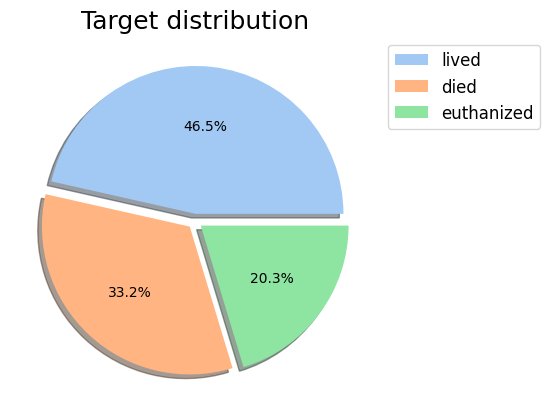

<Figure size 500x1000 with 0 Axes>

In [20]:
target_dist = df_train['outcome'].value_counts()

plt.pie(target_dist, shadow=True, explode=[.05,.05, .05], autopct='%.1f%%')

plt.title('Target distribution', size=18)
plt.legend(target_dist.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.figure(figsize=(5,10))

plt.show()

In [21]:
# Calcul de la matrice de corrélation
corr = df_train[num_col].corr()
corr

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
rectal_temp,1.000000,0.176761,0.124377,0.115980,0.088986,-0.060842,0.043342,0.021711,-0.022823,-0.005220
pulse,0.176761,1.000000,0.395130,-0.010132,0.435102,0.004373,0.056391,0.000037,0.021804,0.028273
respiratory_rate,0.124377,0.395130,1.000000,0.003854,0.188777,0.004018,0.004287,0.020502,-0.010536,0.009663
nasogastric_reflux_ph,0.115980,-0.010132,0.003854,1.000000,-0.101066,-0.583299,0.433006,0.052951,-0.029683,-0.024594
packed_cell_volume,0.088986,0.435102,0.188777,-0.101066,1.000000,0.176178,-0.059655,-0.083784,0.050659,0.051235
total_protein,-0.060842,0.004373,0.004018,-0.583299,0.176178,1.000000,-0.469784,-0.105598,0.044565,0.020635
abdomo_protein,0.043342,0.056391,0.004287,0.433006,-0.059655,-0.469784,1.000000,0.050051,0.002571,-0.022588
lesion_1,0.021711,0.000037,0.020502,0.052951,-0.083784,-0.105598,0.050051,1.000000,-0.007595,0.002761
lesion_2,-0.022823,0.021804,-0.010536,-0.029683,0.050659,0.044565,0.002571,-0.007595,1.000000,0.644054
lesion_3,-0.005220,0.028273,0.009663,-0.024594,0.051235,0.020635,-0.022588,0.002761,0.644054,1.000000


In [22]:
#Chi2 test for categorical variables
from scipy.stats import chi2_contingency

categorical_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux','rectal_exam_feces','abdomen','abdomo_appearance','lesion_1','lesion_2','surgery', 'age', 'surgical_lesion', 'lesion_3', 'cp_data']
treshold=0.05

print(f'{"Column":<25} | result')
print('-'*40)

for col in categorical_cols:
    cross_tab = pd.crosstab(df_train[col], df_train['outcome'])
    chi2, p, _, _ = chi2_contingency(cross_tab)
    #passed or failed
    result = 'passed' if p < treshold else 'failed'
    print(f'{col:<25} | {result}')




Column                    | result
----------------------------------------
temp_of_extremities       | passed
peripheral_pulse          | passed
mucous_membrane           | passed
capillary_refill_time     | passed
pain                      | passed
peristalsis               | passed
abdominal_distention      | passed
nasogastric_tube          | passed
nasogastric_reflux        | passed
rectal_exam_feces         | passed
abdomen                   | passed
abdomo_appearance         | passed
lesion_1                  | passed
lesion_2                  | passed
surgery                   | passed
age                       | passed
surgical_lesion           | passed
lesion_3                  | failed
cp_data                   | passed


Preprocessing

In [23]:
# Define the desired order for each categorical feature
desired_orders = {
    'abdominal_distention': {
        'none': 0,
        'slight': 1,
        'moderate': 2,
        'severe': 3
    },
    
    'age' : {
        'young' : 0,
        'adult' : 1
    },

    'peripheral_pulse': {
        'absent' : 0,
        'reduced' : 1,
        'normal' : 2,
        'increased' : 3
    },

   'mucous_membrane': {
        'normal_pink': 0,
        'bright_pink': 1,
        'pale_pink': 2,
        'pale_cyanotic': 3,
        'bright_red': 4,
        'dark_cyanotic': 5
    },

    'capillary_refill_time': {
        'less_3_sec': 0,
        '3': 1,
        'more_3_sec': 2
    },

    'pain': {
        'alert': 0,
        'depressed': 1,
        'slight': 2,
        'mild_pain': 3,
        'severe_pain': 4,
        'extreme_pain': 5
    },

    'peristalsis': {
        'hypermotile': 0,
        'normal': 1,
        'distend_small': 2,
        'hypomotile': 3,
        'absent': 4
    },

    'nasogastric_tube': {
        'none': 0,
        'slight': 1,
        'significant': 2
    },

    'nasogastric_reflux': {
        'none': 0,
        'slight': 1,
        'less_1_liter': 2,
        'more_1_liter': 3
    },

    'rectal_exam_feces': {
        'absent': 0,
        'decreased': 1,
        'normal': 2,
        'increased': 3,
        'serosanguious': 4
    },

    'abdomen': {
        'normal': 0,
        'other': 1,
        'firm': 2,
        'distend small': 3,
        'distend large': 4
    },
}

In [24]:
# Iterate over each column in the DataFrame
for col in df_train.columns:
    # Check if the column is categorical and has a desired order specified
    if col in desired_orders and col in df_train.select_dtypes(include=['object']).columns:
        # Map the values according to the desired order
        df_train[col] = df_train[col].map(desired_orders[col])

In [25]:
# Separate numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Create separate imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for categorical columns
df_train[categorical_cols] = categorical_imputer.fit_transform(df_train[categorical_cols])
# Impute missing values for numerical columns
df_train[numerical_cols] = numerical_imputer.fit_transform(df_train[numerical_cols])

# Encode the new categorical columns
ordinal_encoder = OrdinalEncoder()
df_train[categorical_cols] = ordinal_encoder.fit_transform(df_train[categorical_cols])

# Print dataframe 
df_train.head(10)

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1.0,1.0,38.1,132.0,24.0,1.0,1.0,5.0,2.0,1.0,...,57.0,8.5,2.0,3.4,1.0,2209.0,0.0,0.0,0.0,0.0
1,1.0,1.0,37.5,88.0,12.0,1.0,2.0,3.0,2.0,3.0,...,33.0,64.0,2.0,2.0,1.0,2208.0,0.0,0.0,0.0,1.0
2,1.0,1.0,38.3,120.0,28.0,1.0,1.0,2.0,0.0,5.0,...,37.0,6.4,2.0,3.4,1.0,5124.0,0.0,0.0,0.0,2.0
3,1.0,1.0,37.1,72.0,30.0,0.0,1.0,2.0,2.0,3.0,...,53.0,7.0,1.0,3.9,1.0,2208.0,0.0,0.0,1.0,2.0
4,0.0,1.0,38.0,52.0,48.0,2.0,2.0,0.0,0.0,0.0,...,47.0,7.3,1.0,2.6,0.0,0.0,0.0,0.0,1.0,2.0
5,0.0,1.0,38.1,56.0,32.0,2.0,2.0,1.0,0.0,1.0,...,49.0,8.0,1.0,2.8,0.0,0.0,0.0,0.0,1.0,2.0
6,1.0,1.0,38.3,36.0,16.0,1.0,1.0,0.0,0.0,4.0,...,43.0,75.0,1.0,1.0,0.0,3111.0,0.0,0.0,1.0,1.0
7,0.0,1.0,39.2,114.0,24.0,1.0,1.0,3.0,2.0,3.0,...,57.0,7.6,2.0,4.5,1.0,2207.0,0.0,0.0,1.0,0.0
8,0.0,1.0,37.4,48.0,12.0,1.0,1.0,0.0,0.0,0.0,...,40.0,7.8,1.0,2.6,0.0,0.0,0.0,0.0,1.0,2.0
9,1.0,1.0,38.3,129.0,48.0,1.0,1.0,2.0,0.0,1.0,...,57.0,4.9,1.0,2.9,1.0,3209.0,0.0,0.0,1.0,0.0


In [26]:
# how many missing values in each column after data transformation
df_train.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [27]:
#use quantile transformer to scale the data
scaler = QuantileTransformer()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])


In [28]:
#drop lesion3
X = df_train.drop(columns='outcome')
y = df_train['outcome']

In [29]:
#check if X contain non numerical values
X.dtypes,y.dtypes

(surgery                  float64
 age                      float64
 rectal_temp              float64
 pulse                    float64
 respiratory_rate         float64
 temp_of_extremities      float64
 peripheral_pulse         float64
 mucous_membrane          float64
 capillary_refill_time    float64
 pain                     float64
 peristalsis              float64
 abdominal_distention     float64
 nasogastric_tube         float64
 nasogastric_reflux       float64
 nasogastric_reflux_ph    float64
 rectal_exam_feces        float64
 abdomen                  float64
 packed_cell_volume       float64
 total_protein            float64
 abdomo_appearance        float64
 abdomo_protein           float64
 surgical_lesion          float64
 lesion_1                 float64
 lesion_2                 float64
 lesion_3                 float64
 cp_data                  float64
 dtype: object,
 dtype('float64'))

In [30]:
#Pour améliorer on pourra utiliser quantile transformer pour scaler les données
scaler = QuantileTransformer()
X = scaler.fit_transform(X)

In [31]:
#Normalization of the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Try multiple classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [34]:
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'Bagging': BaggingClassifier(),
}

In [35]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f'{name} F1 score: {f1_score(y_test, y_pred, average="weighted")}')

RandomForest F1 score: 0.7373687590706033
LogisticRegression F1 score: 0.6975375395686707
SVC F1 score: 0.7034904551783604
KNeighbors F1 score: 0.6315969592644598
DecisionTree F1 score: 0.5864154509171307
GradientBoosting F1 score: 0.7341697573114123
AdaBoost F1 score: 0.6896028943061419


c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ExtraTrees F1 score: 0.7088161674534244
Bagging F1 score: 0.6372527056202865


In [36]:
# Iterate over each column in the DataFrame
for col in df_test.columns:
    # Check if the column is categorical and has a desired order specified
    if col in desired_orders and col in df_test.select_dtypes(include=['object']).columns:
        # Map the values according to the desired order
        df_test[col] = df_test[col].map(desired_orders[col])

In [37]:
# Separate numerical and categorical columns
numerical_cols = df_test.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_test.select_dtypes(include=['object']).columns

# Create separate imputers for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for categorical columns
df_test[categorical_cols] = categorical_imputer.fit_transform(df_test[categorical_cols])
# Impute missing values for numerical columns
df_test[numerical_cols] = numerical_imputer.fit_transform(df_test[numerical_cols])

# Encode the new categorical columns
ordinal_encoder = OrdinalEncoder()
df_test[categorical_cols] = ordinal_encoder.fit_transform(df_test[categorical_cols])

# Print dataframe 
df_test.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235.0,0.0,1.0,534053.0,38.6,40.0,20.0,2.0,2.0,0.0,...,1.0,42.0,7.5,0.0,2.3,0.0,0.0,0.0,0.0,0.0
1,1236.0,1.0,1.0,528469.0,38.2,112.0,48.0,1.0,1.0,1.0,...,1.0,44.0,6.0,2.0,2.6,0.0,2208.0,0.0,0.0,1.0
2,1237.0,1.0,1.0,528178.0,37.7,66.0,12.0,1.0,2.0,4.0,...,1.0,31.5,6.0,1.0,1.6,1.0,2205.0,0.0,0.0,1.0
3,1238.0,0.0,1.0,534784.0,37.1,88.0,20.0,1.0,1.0,3.0,...,1.0,75.0,81.0,2.0,1.0,1.0,1400.0,0.0,0.0,0.0
4,1239.0,1.0,1.0,529840.0,38.3,50.0,12.0,1.0,2.0,1.0,...,1.0,37.0,6.8,1.0,2.6,1.0,2208.0,0.0,0.0,1.0
5,1240.0,1.0,1.0,530239.0,38.5,104.0,36.0,1.0,2.0,4.0,...,1.0,69.0,8.9,2.0,6.0,1.0,2207.0,0.0,0.0,1.0
6,1241.0,1.0,1.0,528548.0,40.8,114.0,36.0,0.0,1.0,5.0,...,1.0,40.0,8.6,2.0,2.6,1.0,2209.0,0.0,0.0,1.0
7,1242.0,0.0,0.0,528503.0,40.3,114.0,36.0,1.0,1.0,3.0,...,1.0,48.0,7.0,2.0,2.8,1.0,2209.0,0.0,0.0,1.0
8,1243.0,1.0,1.0,5287179.0,38.3,66.0,12.0,1.0,1.0,2.0,...,1.0,39.0,6.0,2.0,3.4,1.0,4205.0,0.0,0.0,0.0
9,1244.0,0.0,1.0,527563.0,38.3,64.0,22.0,2.0,2.0,1.0,...,1.0,54.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#use quantile transformer to scale the data
scaler = QuantileTransformer()
df_test[numerical_cols] = scaler.fit_transform(df_test[numerical_cols])

c:\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (824). n_quantiles is set to n_samples.
  warnings.warn(


In [39]:
# #drop lesion3
# df_test.drop('lesion_3', axis=1, inplace=True)
# X = df_test.drop(columns='outcome')
# y = df_test['outcome']

In [40]:
#Normalization of the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [41]:
# from sklearn.ensemble import GradientBoostingClassifier
# import pandas as pd

# Supprimer les colonnes inutiles de df_test
df_test_processed = df_test.drop(['hospital_number', 'id'], axis=1)

# Séparer les features (X) et la variable cible (y) pour df_train
X_train = df_train.drop('outcome', axis=1)
y_train = df_train['outcome']

# Initialiser et entraîner le modèle Gradient Boosting sur df_train
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Faire des prédictions sur df_test_processed
predictions = gb_model.predict(df_test_processed)

# Convertir les prédictions en labels correspondants
labels = ['lived' if pred == 1.0 else 'died' if pred == 0.0 else 'euthanized' for pred in predictions]

# Créer un DataFrame de soumission à partir des prédictions
submission = pd.DataFrame({'id': id_List, 'outcome': labels})

# Enregistrer le DataFrame de soumission au format CSV
submission.to_csv('data/submission.csv', index=False)

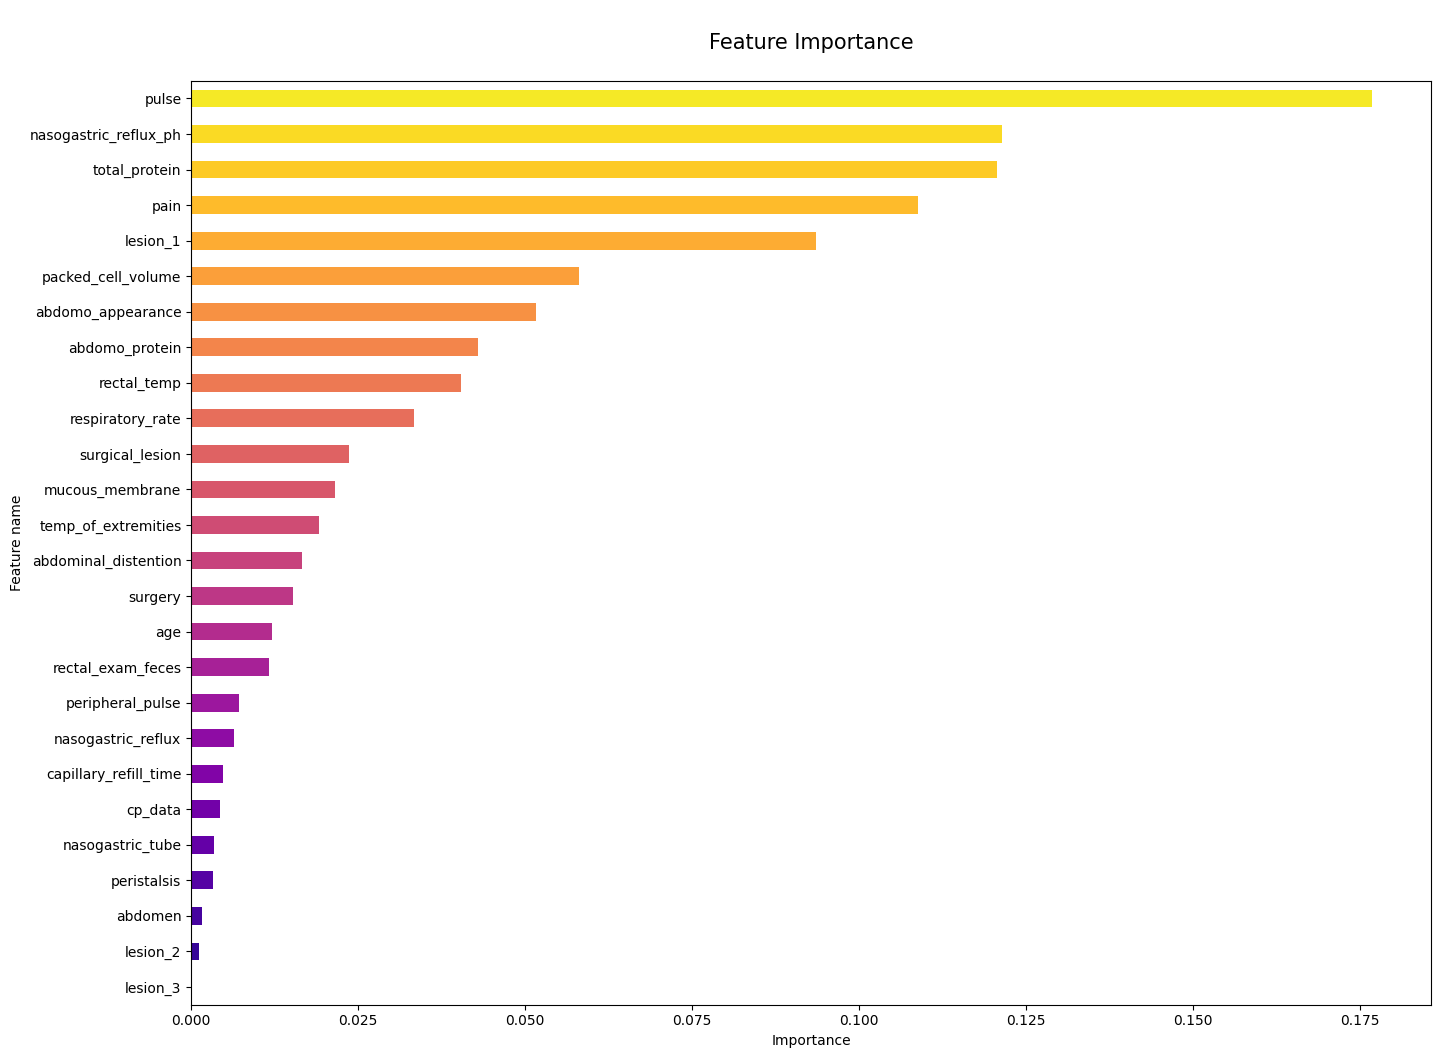

In [42]:
feature_importance = pd.DataFrame(data = {'feature': df_train.columns[:-1], 'importance': gb_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=True)

feature_importance.plot(kind='barh', x='feature', y='importance', legend=False, color=sns.color_palette('plasma', n_colors=len(feature_importance)), figsize=(16, 12))

plt.xlabel('Importance')
plt.ylabel('Feature name')
plt.title('\nFeature Importance\n', fontsize=15)
plt.show()

# Amélioration

Nous obtenons un score de 0.70 en moyennes avec différents classifiers. Nous allons essayer d'améliorer ce score en utilisant des techniques de prétraitement de données et de feature engineering.